In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.quantum_info import Statevector
from qiskit import transpile

sim = QasmSimulator() # making new simulator object

# Loading the IBM Quantum account(s)

provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
from qiskit import QuantumCircuit

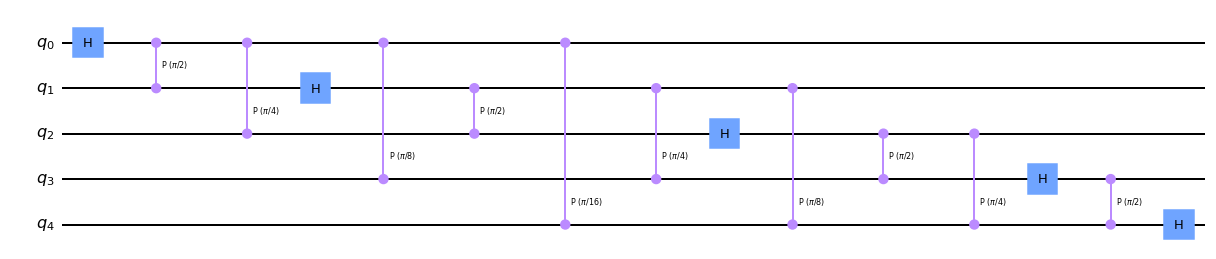

In [6]:
def myQFT(nqubits):
    circuit = QuantumCircuit(nqubits, name = '  myQFT  ')
    
    for n in range(nqubits): # for nth qubit
        circuit.h(n)
        for m in range(n+1, nqubits): #for all the other qubits
            circuit.cp(np.pi/2**(m-n), m, n)
                        
    return circuit #output is in a reversed order of the input states
                        
myQFT(5).draw()

In [7]:
n = 3

myQFT5 = myQFT(n)

In [8]:
qc = QuantumCircuit(n)

qc.x(0)
#qc.x(1)
#qc.x(2)
#qc.x(3)
#qc.x(4)

qc.append(myQFT5, qc.qubits)

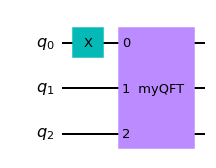

In [9]:
qc.draw()

In [10]:
ket = Statevector(qc)
#ket.draw()
ket.draw('latex')

<IPython.core.display.Latex object>

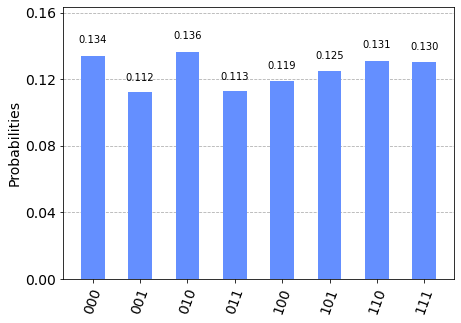

In [11]:
#Use cmd+/ to uncomments lines of code below

qc.measure_all()

from qiskit import execute

counts = execute(qc, backend=sim, shots=1000).result().get_counts(qc)

from qiskit.visualization import plot_histogram
plot_histogram(counts)